---
## <center>Conjunto de Dados Iris</center>
---

<div align="center">
  <img src="/home/laza/Documentos/dados-treina/estudo/iris.jpeg" alt="Imagem da flor Iris">
</div>


O conjunto de dados **Iris** é um dos conjuntos de dados mais conhecidos para aprendizado de máquina e estatística. Ele contém **150 amostras** de flores de íris, distribuídas igualmente entre **três espécies**: *Setosa*, *Versicolor* e *Virginica*. Para cada flor, há quatro características medidas:

- **Comprimento da Sépala** (em cm)
- **Largura da Sépala** (em cm)
- **Comprimento da Pétala** (em cm)
- **Largura da Pétala** (em cm)

O objetivo comum ao trabalhar com esse conjunto de dados é construir modelos de classificação que sejam capazes de identificar a espécie da flor com base nas características fornecidas. Devido à sua simplicidade e estrutura equilibrada, o conjunto de dados Iris é amplamente utilizado para explorar técnicas de visualização e classificação em aprendizado de máquina.

---
## <center>Importando as bibliotecas (Parte 01)</center>
---

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

---
## <center>Importando os dados</center> 
---

In [65]:
data = sns.load_dataset('iris')
iris = pd.DataFrame(data)

---
## <center>Primeiras observacoes</center>
<center>Analise exploratoria (parte 1)</center>

---
**Etapa 01: visualizando o DataFrame**
- DataFrame
- info()
- describe()

**Etapa 02: separando as categorias**
- setosa (DataFrame, info() e describe())
- versicolor (DataFrame, info() e describe())
- virginica (DataFrame, info() e describe())

**Etapa 03: resumo da analise estatistica descritiva (parte 01)**
- setosa (analise/resumo)
- versicolor (analise/resumo)
- virginica (analise/resumo)
- iris data base (analise/resumo)

---




In [127]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [117]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


No iris.info() temos:

- **RangeIndex: 150 entries, 0 to 149** 150 entradas que vao de 0 a 149
- **Data columns (total 5 columns)** 5 colunas
- **Colunas de 0 a 3 - 150 float64** sao numeros decimais
- **4   species object** coluna do tipo objeto
- **Non-Null Count - non-null** nenhum valor vazio - caso existisse, teria que ser tratado

In [118]:
iris.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5



---
<center>Separando os dados (categorias/species)</center>

---

In [69]:
setosa = iris.loc[iris['species'] == 'setosa']
versicolor = iris.loc[iris['species'] == 'versicolor']
virginica = iris.loc[iris['species'] == 'virginica']


In [70]:
setosa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  50 non-null     float64
 1   sepal_width   50 non-null     float64
 2   petal_length  50 non-null     float64
 3   petal_width   50 non-null     float64
 4   species       50 non-null     object 
dtypes: float64(4), object(1)
memory usage: 2.3+ KB


In [71]:
setosa.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,50.0,5.006,0.352490,4.3,4.8,5.0,5.200,5.8
sepal_width,50.0,3.428,0.379064,2.3,3.2,3.4,3.675,4.4
petal_length,50.0,1.462,0.173664,1.0,1.4,1.5,1.575,1.9
petal_width,50.0,0.246,0.105386,0.1,0.2,0.2,0.300,0.6


In [91]:
valores_setosa_describe = setosa.describe().T
valores_setosa_describe['var_abs'] = valores_setosa_describe['max'] - valores_setosa_describe['min']
valores_setosa_describe['%'] = (valores_setosa_describe['var_abs'] / valores_setosa_describe['min']) * 100
valores_setosa_describe


,count,mean,std,min,25%,50%,75%,max,var_abs,%
sepal_length,50.0,5.006,0.352490,4.3,4.8,5.0,5.200,5.8,1.5,34.883721
sepal_width,50.0,3.428,0.379064,2.3,3.2,3.4,3.675,4.4,2.1,91.304348
petal_length,50.0,1.462,0.173664,1.0,1.4,1.5,1.575,1.9,0.9,90.000000
petal_width,50.0,0.246,0.105386,0.1,0.2,0.2,0.300,0.6,0.5,500.000000


In [72]:
versicolor.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, 50 to 99
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  50 non-null     float64
 1   sepal_width   50 non-null     float64
 2   petal_length  50 non-null     float64
 3   petal_width   50 non-null     float64
 4   species       50 non-null     object 
dtypes: float64(4), object(1)
memory usage: 2.3+ KB


In [73]:
versicolor.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,50.0,5.936,0.516171,4.9,5.600,5.90,6.3,7.0
sepal_width,50.0,2.770,0.313798,2.0,2.525,2.80,3.0,3.4
petal_length,50.0,4.260,0.469911,3.0,4.000,4.35,4.6,5.1
petal_width,50.0,1.326,0.197753,1.0,1.200,1.30,1.5,1.8


In [92]:
valores_versicolor_describe = versicolor.describe().T
valores_versicolor_describe['var_abs'] = valores_versicolor_describe['max'] - valores_versicolor_describe['min']
valores_versicolor_describe['%'] = (valores_versicolor_describe['var_abs'] / valores_versicolor_describe['min']) * 100
valores_versicolor_describe

,count,mean,std,min,25%,50%,75%,max,var_abs,%
sepal_length,50.0,5.936,0.516171,4.9,5.600,5.90,6.3,7.0,2.1,42.857143
sepal_width,50.0,2.770,0.313798,2.0,2.525,2.80,3.0,3.4,1.4,70.000000
petal_length,50.0,4.260,0.469911,3.0,4.000,4.35,4.6,5.1,2.1,70.000000
petal_width,50.0,1.326,0.197753,1.0,1.200,1.30,1.5,1.8,0.8,80.000000


In [74]:
virginica.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, 100 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  50 non-null     float64
 1   sepal_width   50 non-null     float64
 2   petal_length  50 non-null     float64
 3   petal_width   50 non-null     float64
 4   species       50 non-null     object 
dtypes: float64(4), object(1)
memory usage: 2.3+ KB


In [75]:
virginica.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,50.0,6.588,0.635880,4.9,6.225,6.50,6.900,7.9
sepal_width,50.0,2.974,0.322497,2.2,2.800,3.00,3.175,3.8
petal_length,50.0,5.552,0.551895,4.5,5.100,5.55,5.875,6.9
petal_width,50.0,2.026,0.274650,1.4,1.800,2.00,2.300,2.5


In [93]:
valores_virginica_describe = virginica.describe().T
valores_virginica_describe['var_abs'] = valores_virginica_describe['max'] - valores_virginica_describe['min']
valores_virginica_describe['%'] = (valores_virginica_describe['var_abs'] / valores_virginica_describe['min']) * 100
valores_virginica_describe

,count,mean,std,min,25%,50%,75%,max,var_abs,%
sepal_length,50.0,6.588,0.635880,4.9,6.225,6.50,6.900,7.9,3.0,61.224490
sepal_width,50.0,2.974,0.322497,2.2,2.800,3.00,3.175,3.8,1.6,72.727273
petal_length,50.0,5.552,0.551895,4.5,5.100,5.55,5.875,6.9,2.4,53.333333
petal_width,50.0,2.026,0.274650,1.4,1.800,2.00,2.300,2.5,1.1,78.571429


In [174]:
iris.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


In [94]:
valores_iris_describe = iris.describe().T
valores_iris_describe['var_abs'] = valores_iris_describe['max'] - valores_iris_describe['min']
valores_iris_describe['%'] = (valores_iris_describe['var_abs'] / valores_iris_describe['min']) * 100
valores_iris_describe

,count,mean,std,min,25%,50%,75%,max,var_abs,%
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9,3.6,83.72093
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4,2.4,120.00000
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9,5.9,590.00000
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5,2.4,2400.00000


---
### <center>Resumo das Análises de Estatísticas Descritivas para as Espécies Setosa, Versicolor, Virginica e o Conjunto Completo</center>
---
As análises estatísticas para as três espécies de íris — Setosa, Versicolor e Virginica — e o conjunto completo de dados fornecem insights sobre as diferenças e similaridades em relação aos atributos de comprimento e largura de sépalas e pétalas. Abaixo, apresentamos um resumo geral para cada análise.

---

**Setosa:**
- As análises revelam que os comprimentos das sépalas e pétalas são consistentemente maiores que as larguras.
- O desvio padrão das larguras de sépalas e pétalas é menor que o dos comprimentos, indicando menor variação nas larguras.
- Observa-se que o maior desvio padrão está associado ao comprimento das sépalas, enquanto o menor desvio padrão ocorre na largura das pétalas.
- Tanto a média quanto a mediana têm valores muito próximos, sugerindo uma distribuição simétrica.
- A maior variação em valor absoluto é observada na largura da sépala, com 2,1 cm.
- A variação percentual mais alta ocorre na largura da pétala, atingindo 500%.

**Versicolor:**
- Similarmente à Setosa, os comprimentos das sépalas e pétalas superam as larguras.
- A variação nas larguras é menor que nos comprimentos, como indicado pelo desvio padrão.
- O comprimento das sépalas apresenta o maior desvio padrão, enquanto a largura das pétalas tem o menor.
- A média e a mediana são novamente próximas, sugerindo uma distribuição aproximadamente simétrica.
- A maior variação absoluta é encontrada tanto no comprimento da sépala quanto no comprimento da pétala, com uma diferença de 2,1 cm.
- Em termos percentuais, a maior variação ocorre na largura da pétala, com 80%.

**Virginica:**
- Assim como nas outras espécies, os comprimentos de sépalas e pétalas superam as larguras.
- A largura das sépalas e pétalas tem um desvio padrão menor que o comprimento, indicando variação reduzida nas larguras.
- O maior desvio padrão está no comprimento das sépalas e o menor na largura das pétalas.
- A média e a mediana continuam com valores próximos, mantendo a distribuição simétrica.
- A maior variação em valor absoluto ocorre no comprimento da sépala, com uma diferença de 3,0 cm.
- A maior variação percentual está na largura da pétala, com 78%.

**Conjunto Completo:**
- Analisando as três espécies juntas, os comprimentos das sépalas e pétalas ainda se destacam sobre as larguras.
- Assim como nas análises individuais, o desvio padrão das larguras é menor que o dos comprimentos.
- A maior variação padrão ocorre no comprimento das sépalas, e a menor no desvio padrão da largura das pétalas.
- As médias e medianas são aproximadas, indicando distribuição equilibrada.
- A maior variação absoluta é observada no comprimento da pétala, com uma diferença de 5,9 cm.
- A maior variação percentual ocorre na largura da pétala, com 2400%.

---

### Conclusão

As análises dos dados de Setosa, Versicolor, Virginica e do conjunto completo reforçam uma estrutura padrão entre as espécies, onde os comprimentos superam as larguras e as variações são mais acentuadas nas medidas de comprimento. Essa estrutura fornece uma base para modelagens e classificações entre espécies, dada a consistência nas características de variação e simetria estatística das medições.

---
## <center>Analise grafica</center>

**Boxplot**
- **sns.boxplot(data=iris)**: analisa simultaneamente todas as variaveis numericas do DataFrame iris.
- **sns.boxplot(x='species',y='sepal_length',data=iris)**: analisa cada especie com o comprimento da sepala.
- **sns.boxplot(x='species',y='sepal_width',data=iris)**: analisa cada especie com a largura da sepala.
- **sns.boxplot(x='species',y='petal_length',data=iris)**: analisa cada especie com o comprimento da petala.
- **sns.boxplot(x='species',y='petal_width',data=iris)**: analisa cada especie com a largura da petala.

**Histograma:**
- **fig, axs = plt.subplots(2,2,figsize=(12,8))**: analisa simultaneamente todas as variaveis numericas do DataFrame iris.
- **sns.hisplot(x='species',y='sepal_length',data=iris)**: analisa cada especie com o comprimento da sepala.
- **sns.hisplot(x='species',y='sepal_width',data=iris)**: analisa cada especie com a largura da sepala.
- **sns.hisplot(x='species',y='petal_length',data=iris)**: analisa cada especie com o comprimento da petala.
- **sns.hisplot(x='species',y='petal_width',data=iris)**: analisa cada especie com a largura da petala.




---
<center>boxplot</center>

---


Text(0.5, 1.0, 'Boxplot - iris')

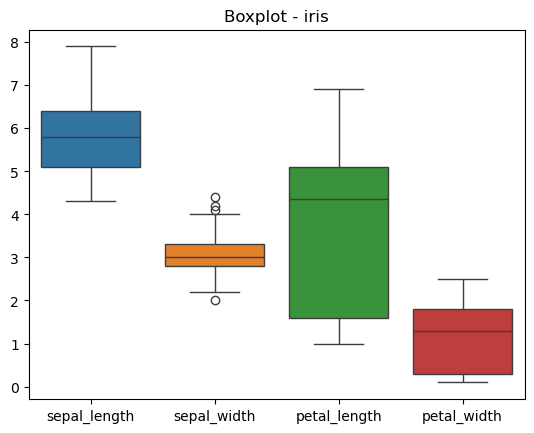

In [125]:
sns.boxplot(data=iris)
plt.title('Boxplot - iris')

Text(0.5, 1.0, 'Boxplot - species x sepal_lenght')

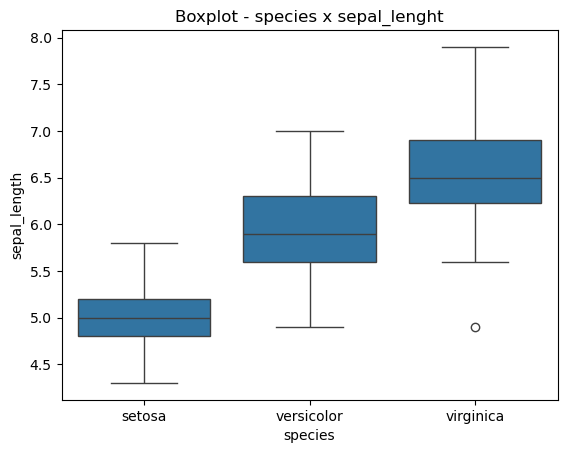

In [129]:
sns.boxplot(x='species',y='sepal_length',data=iris)
plt.title('Boxplot - species x sepal_lenght')

Text(0.5, 1.0, 'Boxplot - species x sepal_width')

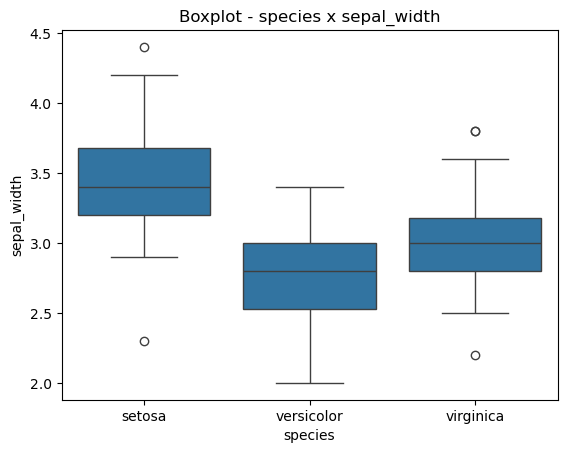

In [130]:
sns.boxplot(x='species',y='sepal_width',data=iris)
plt.title('Boxplot - species x sepal_width')

Text(0.5, 1.0, 'Boxplot - species x petal_length')

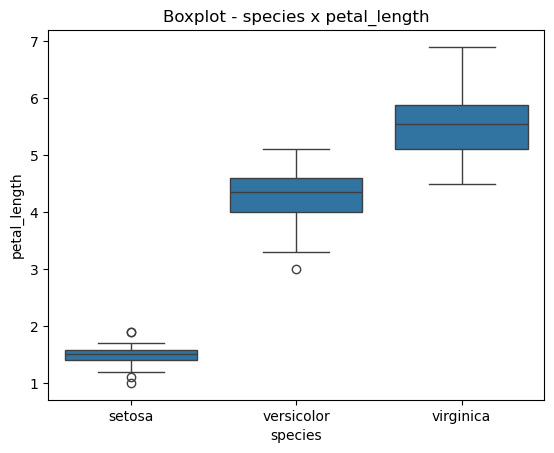

In [132]:
sns.boxplot(x='species',y='petal_length',data=iris)
plt.title('Boxplot - species x petal_length')

Text(0.5, 1.0, 'Boxplot - species x petal_whidth')

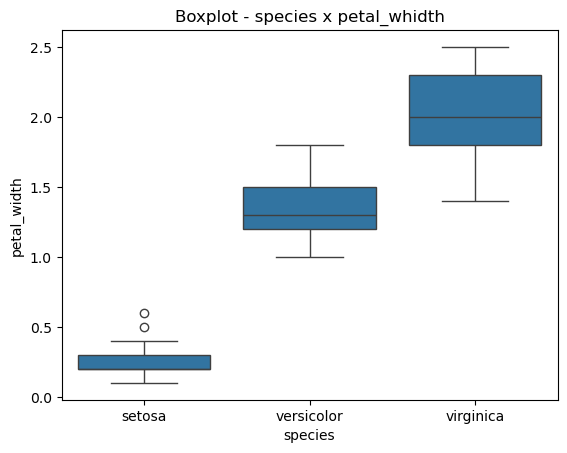

In [133]:
sns.boxplot(x='species',y='petal_width',data=iris)
plt.title('Boxplot - species x petal_whidth')

---
<center>histograma</center>

---

Text(0.5, 1.0, 'Histograma - species x sepal_length')

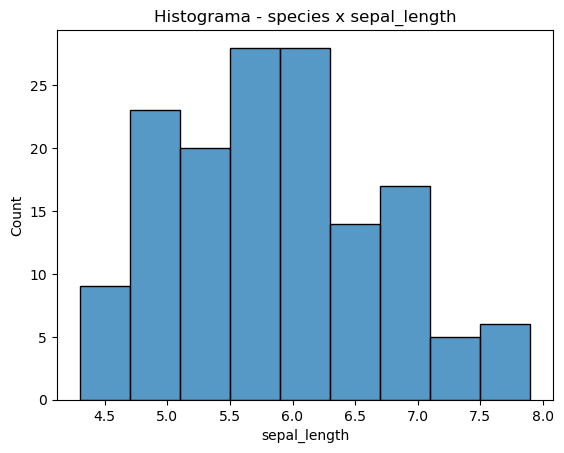

In [172]:
sns.histplot(data=iris, x="sepal_length")
plt.title('Histograma - species x sepal_length')

Text(0.5, 1.0, 'Histograma - species x sepal_width')

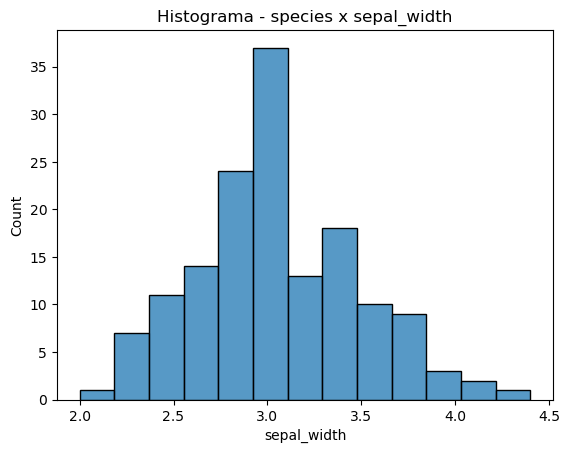

In [159]:
sns.histplot(data=iris, x="sepal_width")
plt.title('Histograma - species x sepal_width')

Text(0.5, 1.0, 'Histograma - species x petal_length')

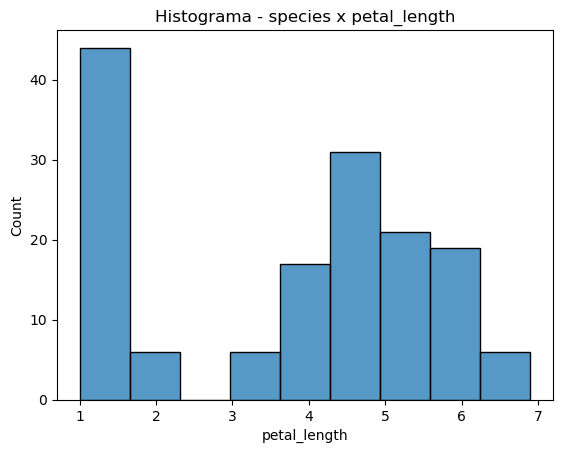

In [180]:
sns.histplot(data=iris, x="petal_length")
plt.title('Histograma - species x petal_length')

Text(0.5, 1.0, 'Histograma - species x sepal_width')

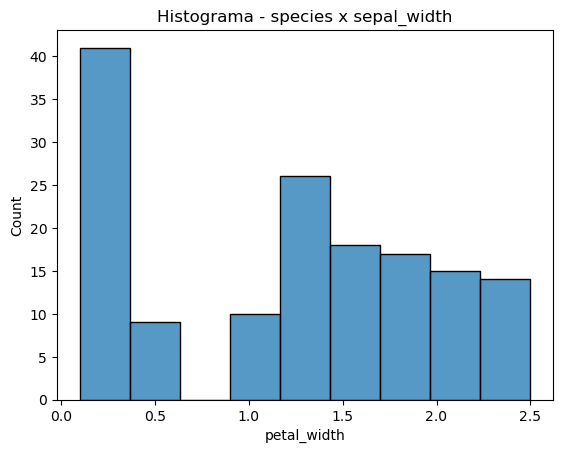

In [181]:
sns.histplot(data=iris, x="petal_width")
plt.title('Histograma - species x sepal_width')

Text(0.5, 1.0, 'Histograma da petal_width')

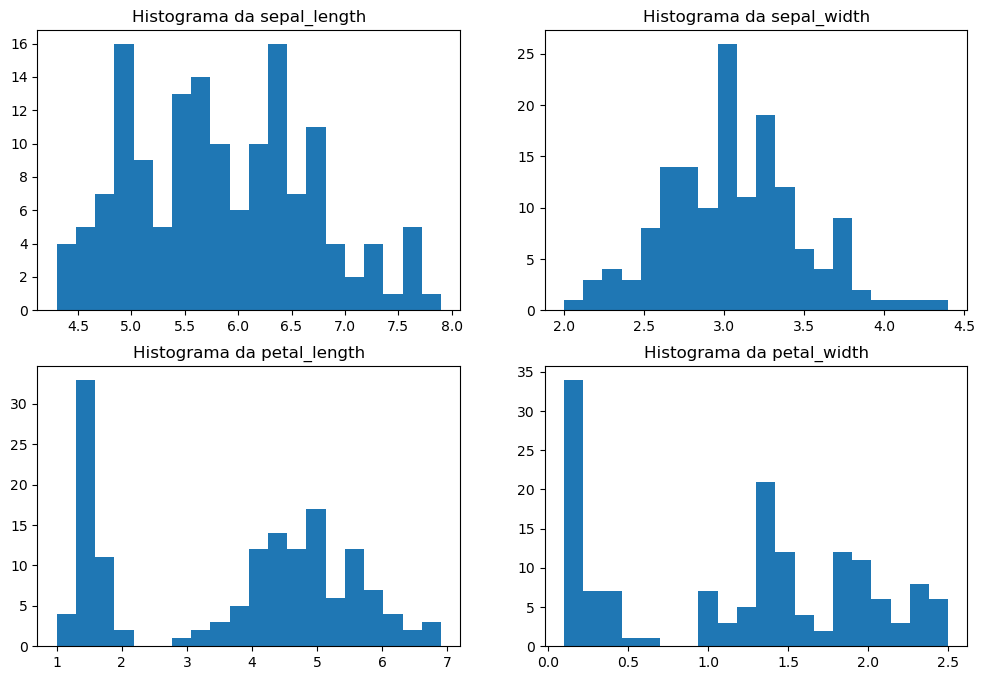

In [179]:
fig, axs = plt.subplots(2,2,figsize=(12,8))
axs[0,0].hist(iris['sepal_length'],bins=20)
axs[0,0].set_title('Histograma da sepal_length')
axs[0,1].hist(iris['sepal_width'],bins=20)
axs[0,1].set_title('Histograma da sepal_width')
axs[1,0].hist(iris['petal_length'],bins=20)
axs[1,0].set_title('Histograma da petal_length')
axs[1,1].hist(iris['petal_width'],bins=20)
axs[1,1].set_title('Histograma da petal_width')

---

Text(0.5, 1.0, 'Histograma - setosa x sepal_length')

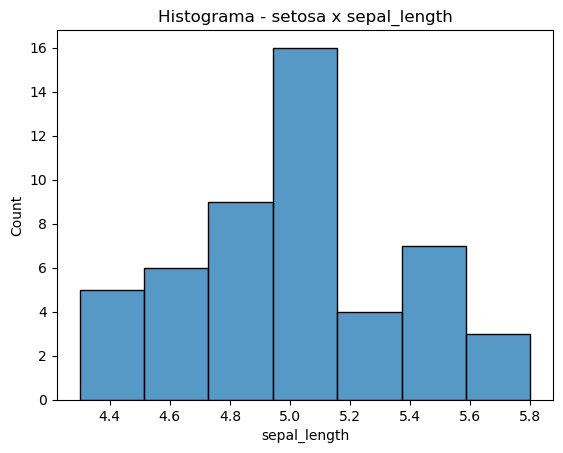

In [183]:
sns.histplot(setosa, x="sepal_length")
plt.title('Histograma - setosa x sepal_length')

Text(0.5, 1.0, 'Histograma - setosa x sepal_width')

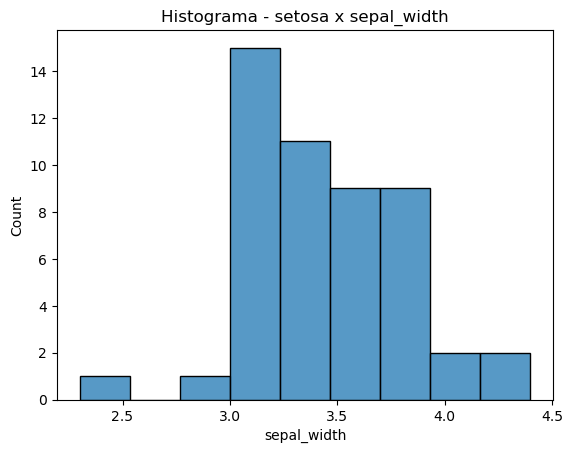

In [184]:
sns.histplot(setosa, x="sepal_width")
plt.title('Histograma - setosa x sepal_width')

Text(0.5, 1.0, 'Histograma - setosa x petal_length')

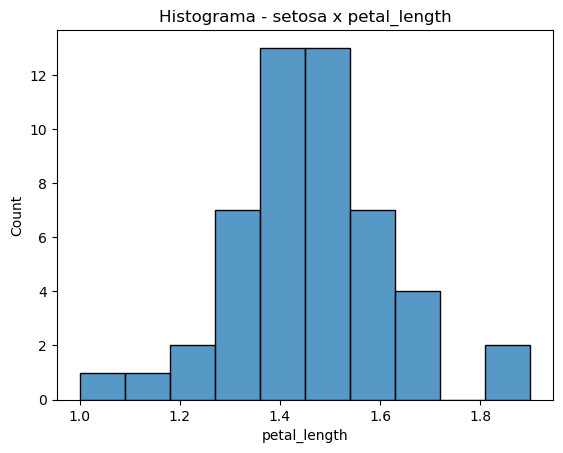

In [185]:
sns.histplot(setosa, x="petal_length")
plt.title('Histograma - setosa x petal_length')

Text(0.5, 1.0, 'Histograma - setosa x petal_width')

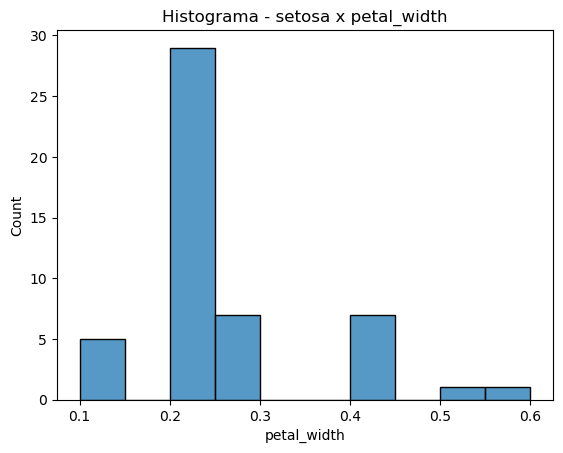

In [186]:
sns.histplot(setosa, x="petal_width")
plt.title('Histograma - setosa x petal_width')

---

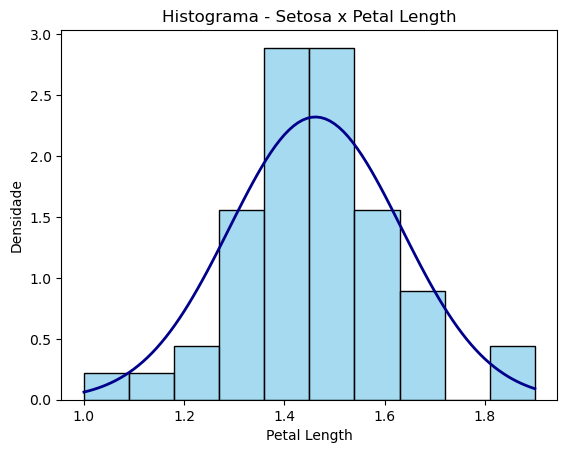

In [198]:
sns.histplot(setosa['petal_length'], kde=False, stat="density", color="skyblue", edgecolor="black")
plt.title('Histograma - Setosa x Petal Length')
mean, std_dev = stats.norm.fit(setosa['petal_length'])
x_values = np.linspace(setosa['petal_length'].min(), setosa['petal_length'].max(), 100)
plt.plot(x_values, stats.norm.pdf(x_values, mean, std_dev), color="darkblue", linewidth=2)

# Exibir o gráfico
plt.xlabel("Petal Length")
plt.ylabel("Densidade")
plt.show()